# Spambase Project

Authors: Eric Rodriguez, Aryeh Freud, Anthony Suvorov, Henry Garkanian

We chose the dataset 'Spambase' from the University of California Irvine. It is a comprehensive dataset of e-mails containing spam and non-spam e-mails.

Goal: We will build a system to predict the percentage likelihood of an e-mail being spam, based on e-mail name and contents.

We will be using features such as word_freq_email and word_freq_table to see the frequency of certain words being used in spam e-mail to determine the percentage likelihood of an e-mail being spam.

As we explore the data we will pin down and determine which features will be best to use in our testing and training.

We may also try other models like Logistic Reasoning, Naive Bayes, Random Forest, XGBoost.

In [1]:
#install ucimlrepo
# !pip3 install -U ucimlrepo
!pip3 install ucimlrepo

In [2]:
#imports and start of file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
#using ucimlrepo fetcher
from ucimlrepo import fetch_ucirepo

%matplotlib inline
sns.set_style('whitegrid')


# sb organizes features, targets, metadata in a single object.
# sb requires pip install of ucimlrepo
# df is a raw DataFrame; you manually separate out features and target.
# df is how we have been doing it in class


In [3]:
#Using ucimlrepo
sb = fetch_ucirepo(id=94)

X = sb.data.features
y = sb.data.targets
# example given by the github repo below
#sklearn.linear_model.LinearRegression().fit(X,y)

print(sb.metadata)
print(sb.variables)
print("Shape of X (features) =", X.shape)
print("Shape of y (target)   =", y.shape)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [4]:
#using pandas
df = pd.read_csv('https://archive.ics.uci.edu/static/public/94/data.csv', header=None)
print("Shape of df =", df.shape)
df.head()

Shape of df = (4602, 58)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
1,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
2,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
3,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1


In [5]:
#Pre-processing
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]

#check for missing values
print("Missing values in features: ", X_df.isnull().sum().sum())
print("Missing values in target: ", y_df.isnull().sum())

#check data type
X_df.dtypes.value_counts()

Missing values in features:  0
Missing values in target:  0


,count
object,57


In [6]:
#Exploration
X_df.describe().T

,count,unique,top,freq
0,4602,143,0,3548
1,4602,172,0,3703
2,4602,215,0,2713
3,4602,44,0,4554
4,4602,256,0,2853
5,4602,142,0,3602
6,4602,174,0,3794
7,4602,171,0,3777
8,4602,145,0,3828
9,4602,246,0,3299


57
0        2788
1        1813
Class       1
Name: count, dtype: int64


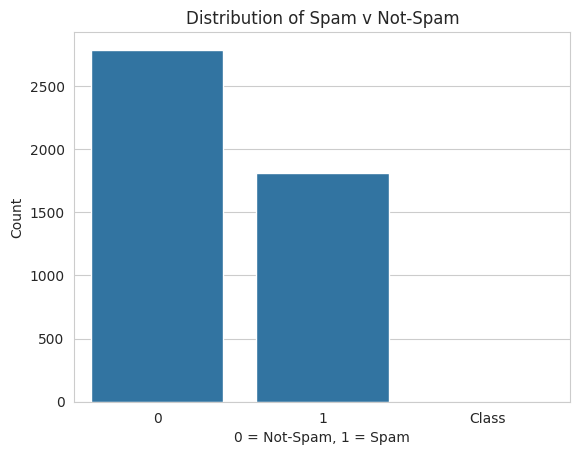

In [7]:
#Exploration
spam_count = y_df.value_counts()
print(spam_count)

sns.barplot(x=spam_count.index, y=spam_count.values)
plt.title("Distribution of Spam v Not-Spam")
plt.xlabel("0 = Not-Spam, 1 = Spam")
plt.ylabel("Count")
plt.show()

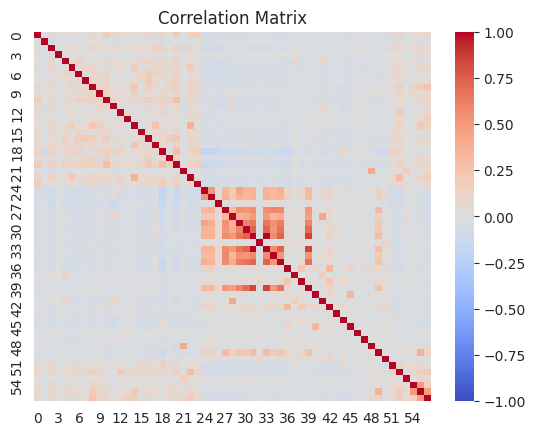

In [8]:
#Exploration
X_numeric = X_df.apply(pd.to_numeric, errors='coerce')
corr_matrix = X_numeric.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title("Correlation Matrix")
plt.show()

In [9]:
#regression testing weights

In [10]:
# select the predictor variables and target variables to be used with regression
X = sb.data.features
y = sb.data.targets

In [11]:
# for repeatability
np.random.seed(42)

In [12]:
X = sb.data.features.to_numpy()  # Convert features to NumPy array
y = sb.data.targets.to_numpy().flatten()
sample_size = min(10000, y.size)
indexes = np.random.choice(y.size, size=sample_size, replace=False)
X_mini = X[indexes]
y_mini = y[indexes]

In [13]:
# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [14]:
# sanity check
print(X_train.shape)
print(X_train[:3])

(3220, 57)
[[-3.39391770e-01 -1.61454267e-01 -5.55014973e-01 -4.54656189e-02
  -4.58049642e-01 -3.45366907e-01 -2.84278362e-01 -2.57162832e-01
  -3.22375344e-01 -3.51707918e-01 -3.03366264e-01 -6.22927586e-01
  -3.07706467e-01 -1.74426647e-01 -1.87117215e-01 -2.96520663e-01
  -3.14138860e-01 -3.44631021e-01 -9.28900670e-01 -1.63299790e-01
  -6.81830095e-01 -1.19740755e-01 -2.81939962e-01 -2.21377647e-01
  -3.24144800e-01 -2.82200489e-01 -2.33545300e-01 -2.17275833e-01
   1.55531393e+01 -2.12269242e-01 -1.45663754e-01 -1.34849959e-01
  -1.75586357e-01 -1.36274566e-01 -1.77721053e-01 -2.37747832e-01
  -3.27722051e-01 -6.17075175e-02 -1.73554978e-01 -1.75424549e-01
  -1.18030712e-01  6.01989870e+00 -2.03382420e-01 -1.30662660e-01
  -3.14184786e-01 -1.99740819e-01 -7.09033936e-02 -1.08960549e-01
  -1.61216957e-01 -4.82980597e-01 -1.62800514e-01 -2.99109100e-01
  -2.87438601e-01 -1.47095718e-01 -1.25300722e-01 -2.31531913e-01
  -4.28910713e-01]
 [-3.39391770e-01 -1.61454267e-01 -5.55014973e

In [15]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())
variable = np.full_like(y_test, np.mean(y_train))
rmse(variable, y_test)

0.6384947904197757

In [16]:
#The test RMSE is the RMSE computed using the test data set
knn = KNeighborsRegressor(algorithm = 'brute')
knn.fit(X_train, y_train)
predictors = knn.predict(X_test)
rmse(predictors, y_test)

0.2592810200477229

In [17]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    regr.fit(X_train, y_train)
    predictors = regr.predict(X_train)
    train = rmse(predictors, y_train)
    test = regr.predict(X_test)
    testvar = rmse(test, y_test)
    return train, testvar

In [18]:
#Print the weighting the gave the lowest test RMSE, and the test RMSE it achieved.
#The k value changes with n and finds the optimized neighbor.
n = 30
ks = np.arange(1, n+1, 2)
best_results = {}
def knn_exp(w):
    test_rmse_weight = []
    for k in ks:
        print(k, ' ', end='')
        regr = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute', metric = 'euclidean', weights = w)
        rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
        test_rmse_weight.append(rmse_te)
    print(w, "weight done")
    best_index = np.argmin(test_rmse_weight)
    best_k = ks[best_index]
    best_rmse_weight = test_rmse_weight[best_index]
    best_results[w] = (best_k, best_rmse_weight)
    print(f"best ball tree k = {best_k}, best ball tree test RMSE: {best_rmse_weight:.3f}")
knn_exp('uniform')
knn_exp('distance')

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  uniform weight done
best ball tree k = 5, best ball tree test RMSE: 0.259
1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  distance weight done
best ball tree k = 15, best ball tree test RMSE: 0.238


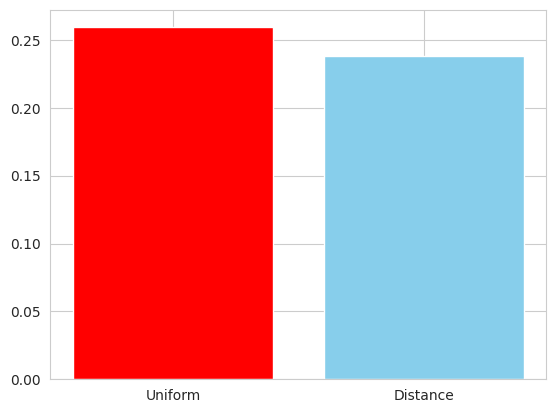

In [19]:
#Graphing
uniform_rmse = best_results['uniform'][1]
distance_rmse = best_results['distance'][1]
rmse_values = [uniform_rmse, distance_rmse]
plt.bar(['Uniform', 'Distance'], rmse_values, color=['red', 'skyblue'])
plt.show()

In [21]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 92.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       818
           1       0.93      0.88      0.90       563

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



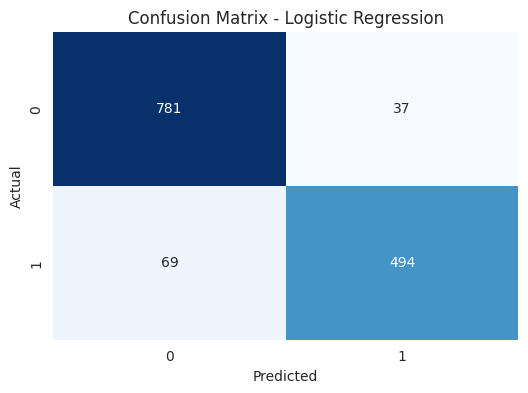

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Important Findings

Data Distribution & Features:
   - The dataset contains spam (1) and non-spam (0) emails; we observed a certain distribution
     of these classes (see the bar plot above).
   - Some word frequency features (e.g., 'word_freq_email', 'word_freq_table')
     appear to be more indicative of spam emails.

Model Performance:
   - Using Logistic Regression, the accuracy is shown above (>90%).
   - The confusion matrix indicates how many spam emails are correctly labeled (True Positives),
     how many non-spam emails are correctly identified (True Negatives), and where our model
     gets confused (False Positives/Negatives).

Overall Conclusion:
   - A machine learning model can reliably predict the probability of an email being spam
     based on selected word frequency features. This highlights the potential for an automated
     spam detection system using these simple yet effective features.